In [1]:
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import os
import torch
import numpy as np
import pandas as pd
from MicroBiome import MicroBiomeDataSet, Trainer, TrainTester, MultiTrainTester
from SNN import FeedForward, SiameseDataSet, SiameseModel, seed_everything
import seaborn as sns
import matplotlib.pyplot as plt   
import numpy as np
import random

# Ignore warning messages
if True:
    import warnings
    warnings.filterwarnings('ignore')

# Load Data

In [2]:
iris = datasets.load_iris()
X = iris.data 
y = iris.target
OneHot = OneHotEncoder(sparse=False)
y = OneHot.fit_transform(y.reshape((y.shape[0], 1)))

In [3]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [4]:
y.shape

(150, 3)

In [5]:
np.sum(y, axis=0)

array([50., 50., 50.])

# Define and Train Model

In [6]:
seed_everything(69)

In [7]:
MyFeedForward = FeedForward(2, [3], activation = 'tanh')

In [8]:
MyFeedForward

FeedForward(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=3, bias=True)
  )
)

In [9]:
MySNN = SiameseModel(MyFeedForward, predict_unknown = False, class_min_train=5, 
                     n_example_predict=10, learning_rate=1.0e-3, num_epochs = 10, batch_size = 10, rand_seed=69)

In [10]:
# list(MySNN.logistic.parameters()) + list(MySNN.model.parameters())

In [11]:
MyTrainer = Trainer(model = MySNN, scale_X = True, use_pca = True, n_components = 2)

In [12]:
MyTrainTester = TrainTester(MyTrainer, metrics.accuracy_score)

In [13]:
n_splits = 5
MyMultiTrainTester = MultiTrainTester(MyTrainTester, n_splits=n_splits)

In [14]:
MyMultiTrainTester.train(X, y)

Running for split 1 of 5
Training Encoder
#########################################
Epoch 1 of 10
__Training__
2021-03-08 04:01:07
MEAN LOSS: 0.4135447778612375
__Validation__
2021-03-08 04:01:09
MEAN LOSS: 0.31713767925111375
#########################################
Epoch 2 of 10
__Training__
2021-03-08 04:01:09
MEAN LOSS: 0.20836134073920548
__Validation__
2021-03-08 04:01:12
MEAN LOSS: 0.26605022921957056
#########################################
Epoch 3 of 10
__Training__
2021-03-08 04:01:12
MEAN LOSS: 0.16910907436488196
__Validation__
2021-03-08 04:01:14
MEAN LOSS: 0.2689464308562899
#########################################
Epoch 4 of 10
__Training__
2021-03-08 04:01:14
MEAN LOSS: 0.15813005635058508
__Validation__
2021-03-08 04:01:17
MEAN LOSS: 0.2745272387439447
#########################################
Epoch 5 of 10
__Training__
2021-03-08 04:01:17
MEAN LOSS: 0.15242171473708005
__Validation__
2021-03-08 04:01:19
MEAN LOSS: 0.2782277735528594
################################

MEAN LOSS: 0.20390635518357159
__Validation__
2021-03-08 04:02:52
MEAN LOSS: 0.22649399079483012
#########################################
Epoch 4 of 10
__Training__
2021-03-08 04:02:52
MEAN LOSS: 0.19378156228922308
__Validation__
2021-03-08 04:02:54
MEAN LOSS: 0.22639494736341073
#########################################
Epoch 5 of 10
__Training__
2021-03-08 04:02:54
MEAN LOSS: 0.19091023978665472
__Validation__
2021-03-08 04:02:57
MEAN LOSS: 0.22792521079718853
#########################################
Epoch 6 of 10
__Training__
2021-03-08 04:02:57
MEAN LOSS: 0.1897133900374174
__Validation__
2021-03-08 04:02:59
MEAN LOSS: 0.2288556182078018
#########################################
Epoch 7 of 10
__Training__
2021-03-08 04:02:59
MEAN LOSS: 0.18893308946788312
__Validation__
2021-03-08 04:03:02
MEAN LOSS: 0.22937146353792703
#########################################
Epoch 8 of 10
__Training__
2021-03-08 04:03:02
MEAN LOSS: 0.18833568489551544
__Validation__
2021-03-08 04:03:04
MEAN L

In [15]:
scores_df = pd.DataFrame({'score': MyMultiTrainTester.train_scores, 'stage' : np.repeat('train', n_splits)})
scores_df = scores_df.append(pd.DataFrame({'score': MyMultiTrainTester.test_scores, 'stage' : np.repeat('test', n_splits)}))
scores_df

,score,stage
0,0.950000,train
1,0.950000,train
2,0.983333,train
3,0.933333,train
4,0.941667,train
0,0.900000,test
1,0.933333,test
2,0.866667,test
3,1.000000,test
4,1.000000,test


<AxesSubplot:xlabel='stage', ylabel='score'>

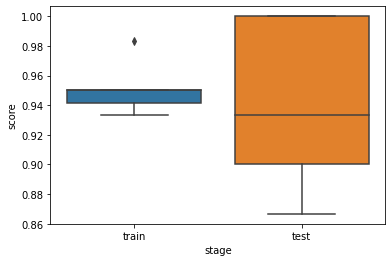

In [16]:
sns.boxplot(data = scores_df, x = 'stage', y = 'score')

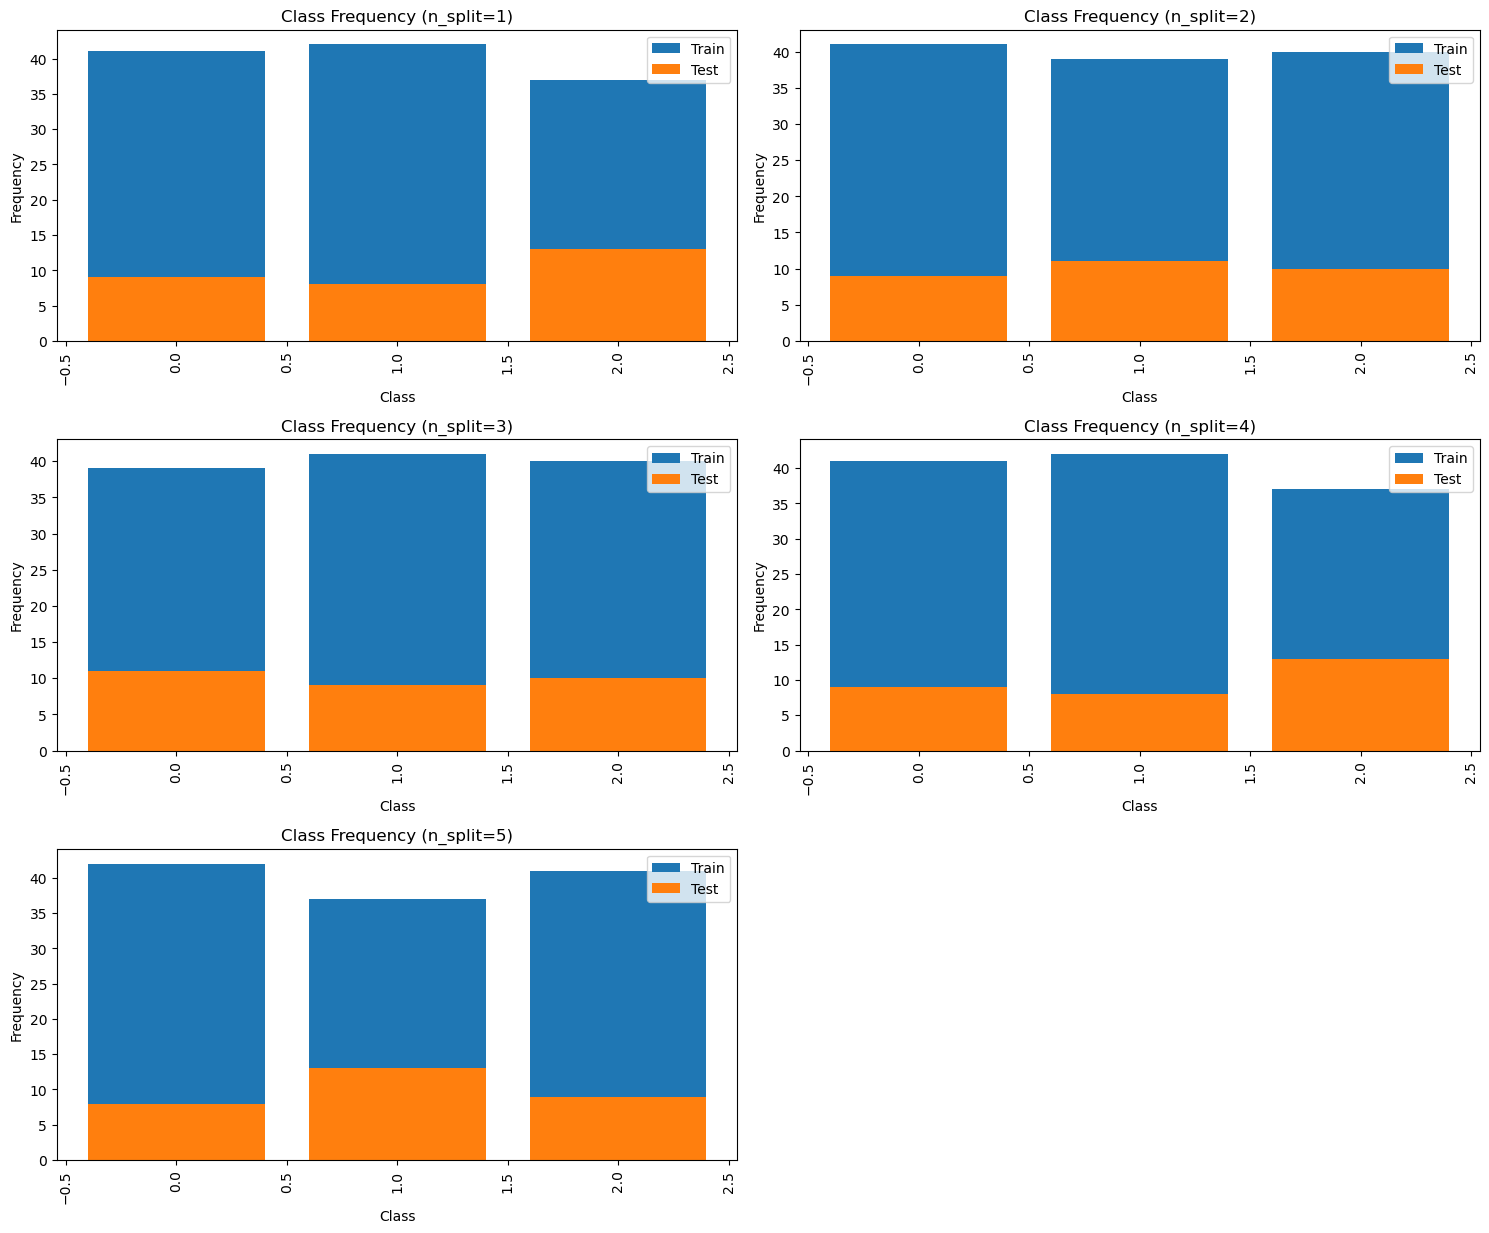

In [17]:
MyMultiTrainTester.plot_class_freq(normalize=True)

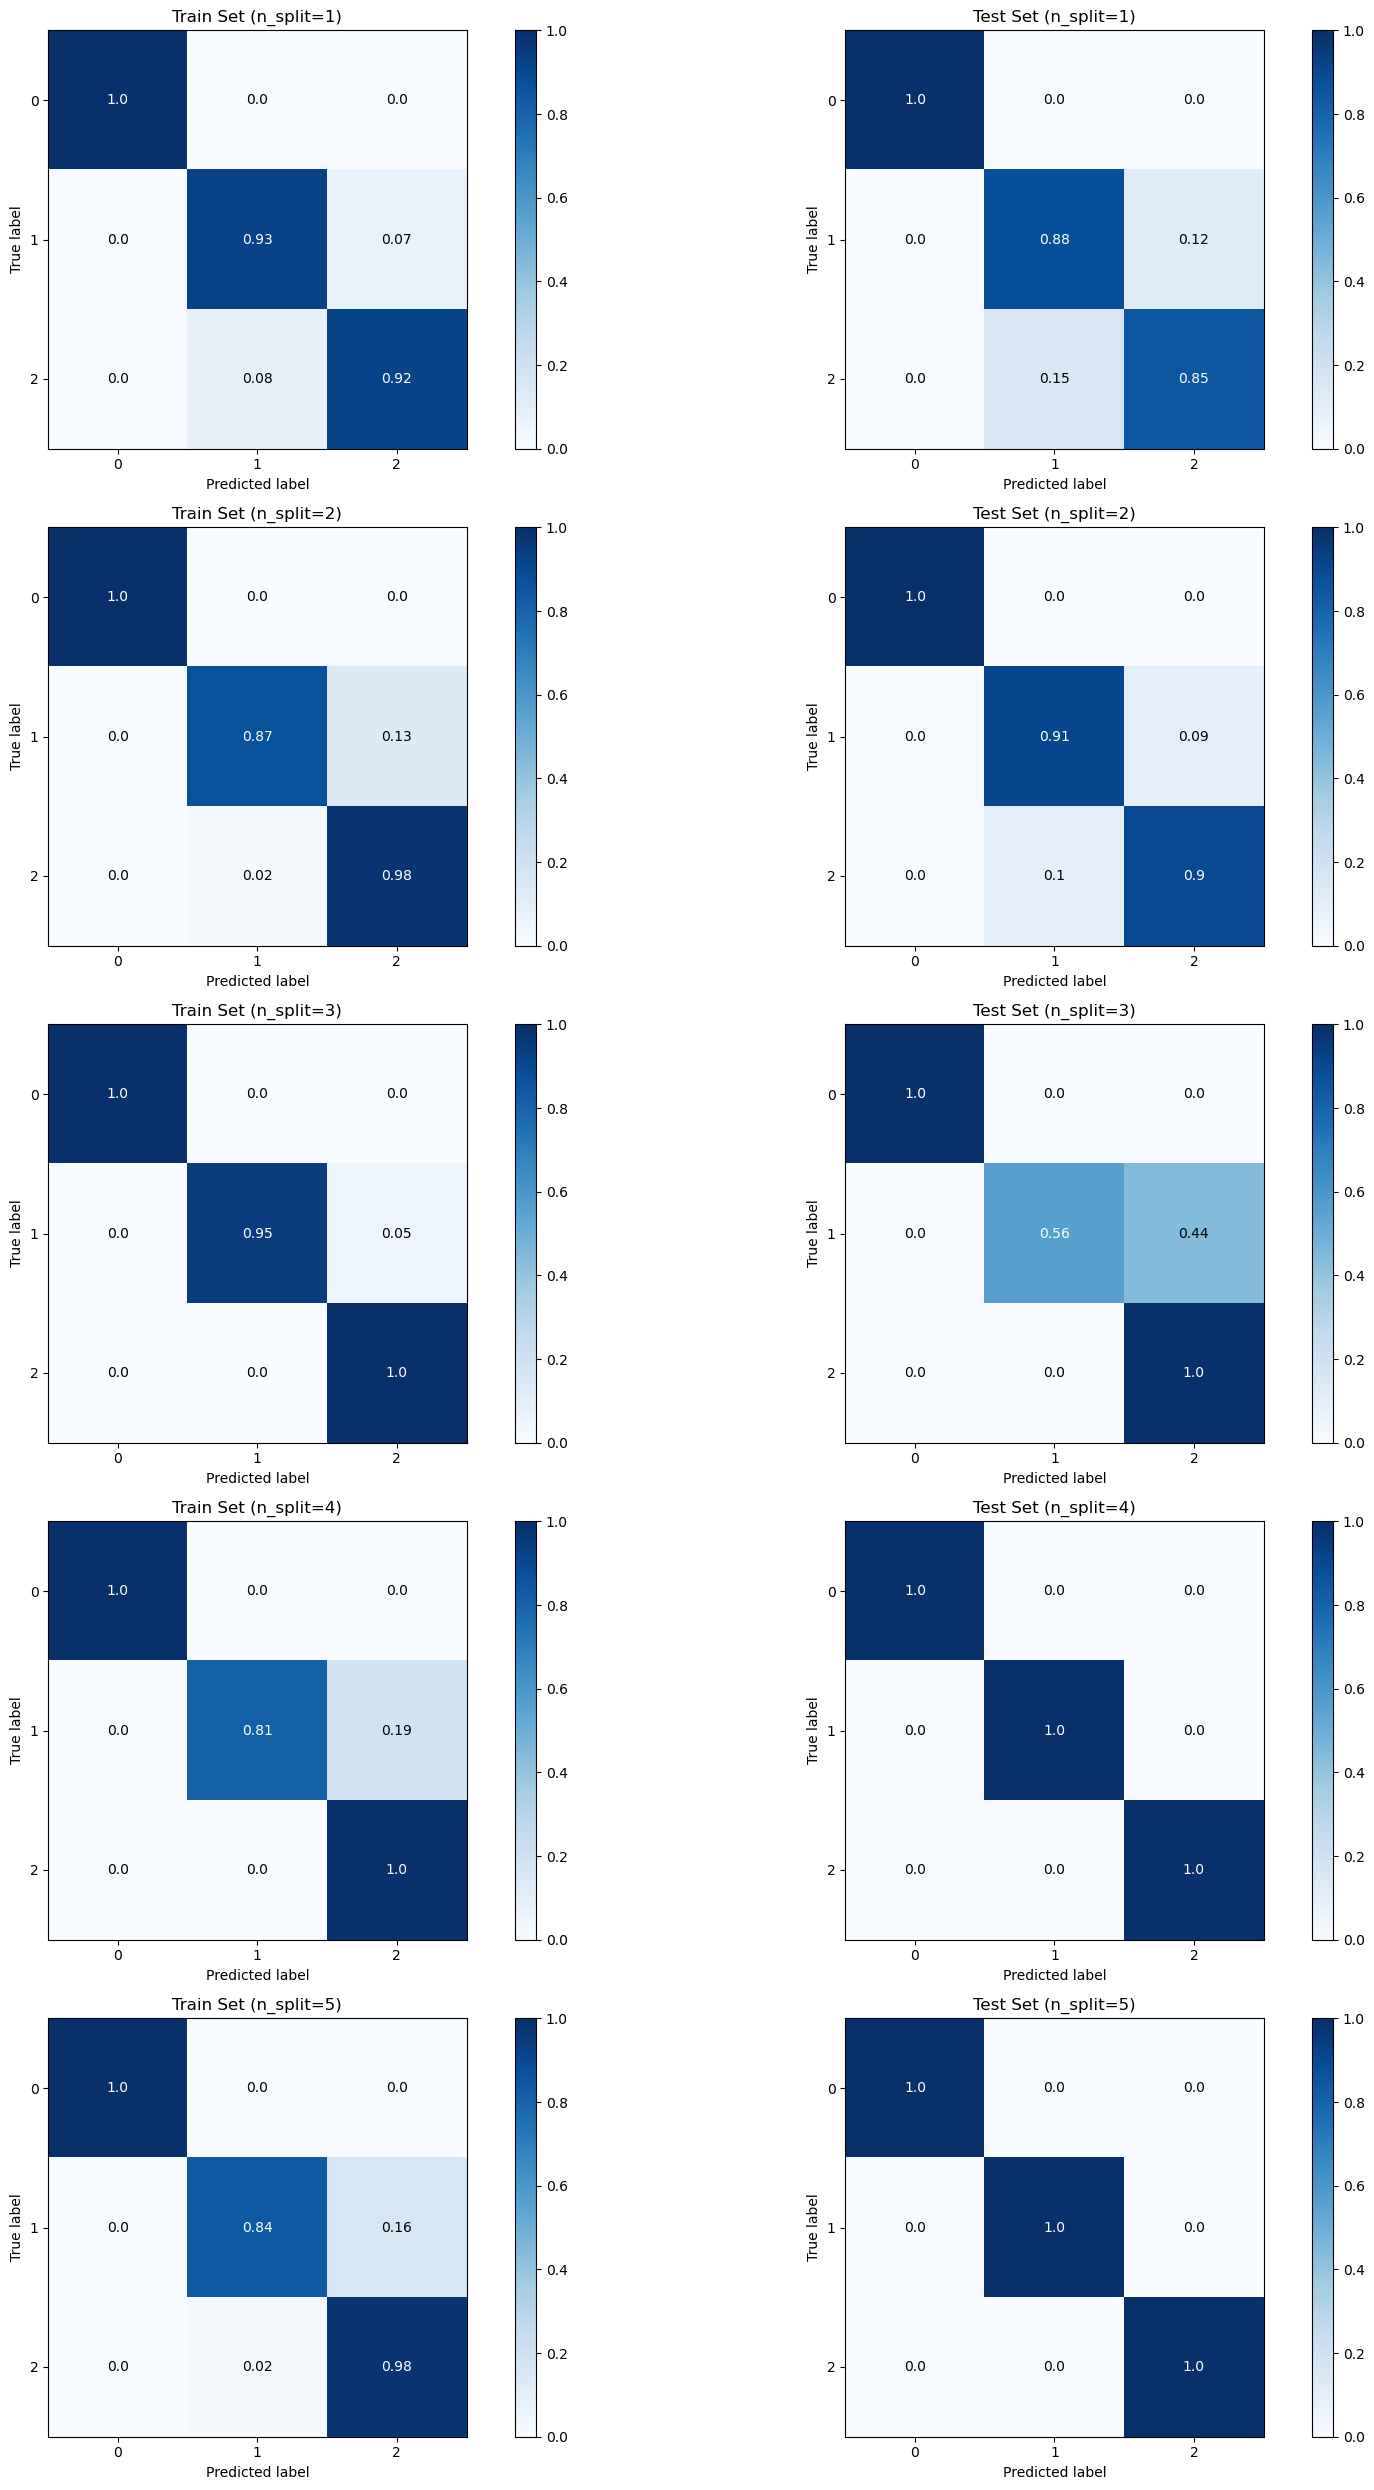

In [18]:
MyMultiTrainTester.plot_confusion(normalize=True)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


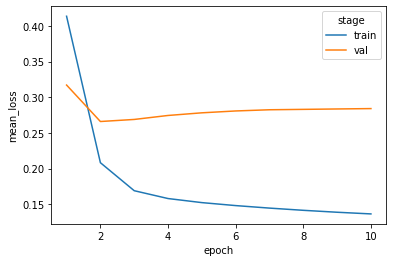

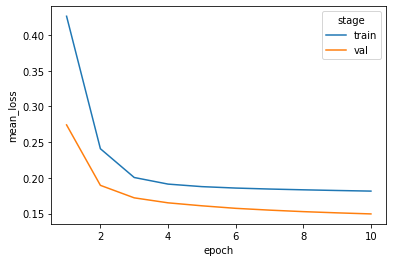

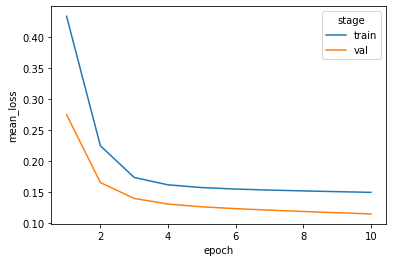

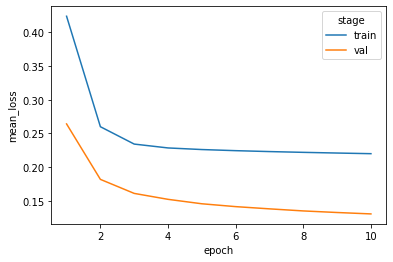

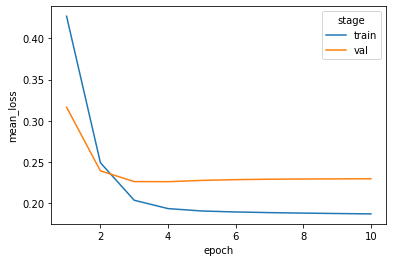

In [19]:
for i, trainer in enumerate(MyMultiTrainTester.TrainerList):
    plt.figure(i)
    print(sns.lineplot(data=trainer.model.TrainStats, x='epoch', y='mean_loss', hue = 'stage'))

### Examine Data In Encoded Space

In [20]:
Trainer_use = MyMultiTrainTester.TrainerList[0]

In [21]:
X_transform = Trainer_use.transform_X(X)

In [22]:
X_encoded = Trainer_use.model.model.forward(torch.from_numpy(X_transform).to(torch.float32)).detach().numpy()

In [23]:
# X_encoded = MyFeedForward.forward(torch.from_numpy(X_transform).to(torch.float32)).detach().numpy()

In [24]:
X_encoded.shape

(150, 3)

In [25]:
y_label = Trainer_use.model.one_hot.inverse_transform(y).astype('str')
y_pred = Trainer_use.model.predict(X_transform)
y_pred = Trainer_use.model.one_hot.inverse_transform(y_pred).astype('str')

In [26]:
X_enc_df = pd.DataFrame(X_encoded, columns = ['X' + str(i+1) for i in range(X_encoded.shape[1])])
X_enc_df['y'] = y_label
X_enc_df['y_pred'] = y_pred

In [27]:
X_enc_df

,X1,X2,X3,y,y_pred
0,-0.743677,0.999453,-0.806908,0,0
1,-0.563338,0.998493,-0.629774,0,0
2,-0.665433,0.999195,-0.728262,0,0
3,-0.588262,0.998742,-0.652237,0,0
4,-0.771893,0.999573,-0.831379,0,0
...,...,...,...,...,...
145,0.850203,-0.480313,0.857019,2,2
146,0.882591,-0.546551,0.896907,2,2
147,0.821510,-0.292695,0.828297,2,2
148,0.783443,-0.142096,0.783653,2,2


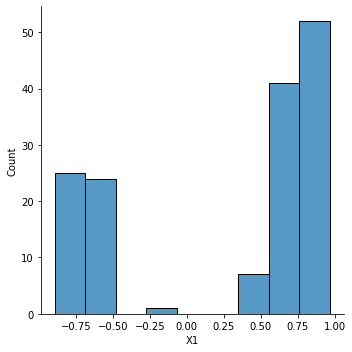

In [28]:
sns.displot(X_enc_df['X1'])

In [29]:
def do_plot(df, x, y, hue):
    if x in df.columns and y in df.columns and hue in df.columns:
        sns.scatterplot(data=df, x=x, y=y, hue = hue)

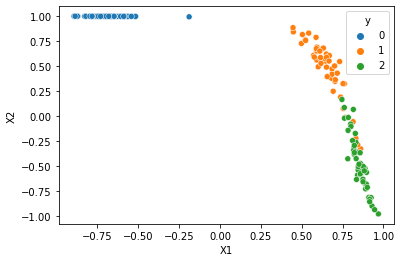

In [30]:
do_plot(X_enc_df, 'X1', 'X2', 'y')

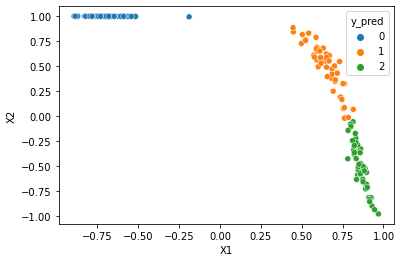

In [31]:
do_plot(X_enc_df, 'X1', 'X2', 'y_pred')

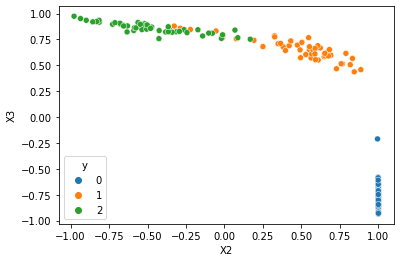

In [32]:
do_plot(X_enc_df, 'X2', 'X3', 'y')

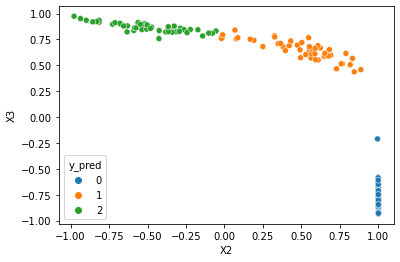

In [33]:
do_plot(X_enc_df, 'X2', 'X3', 'y_pred')

In [34]:
do_plot(X_enc_df, 'X3', 'X4', 'y')

### Examine Data In Original Space

In [35]:
X_df = pd.DataFrame(X, columns = ['X1', 'X2', 'X3', 'X4'])
X_df['y'] = y_label

<AxesSubplot:xlabel='X1', ylabel='X2'>

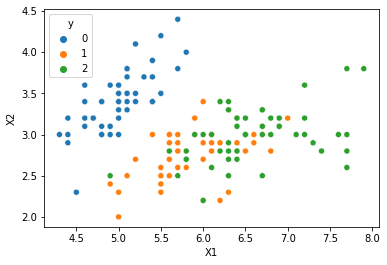

In [36]:
sns.scatterplot(data=X_df, x='X1', y='X2', hue = 'y')

<AxesSubplot:xlabel='X3', ylabel='X4'>

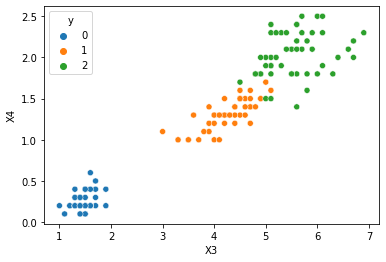

In [37]:
sns.scatterplot(data=X_df, x='X3', y='X4', hue = 'y')